In [1]:
%run preamble.py
%matplotlib inline

# The Dot Product

Let's bring in `a` from before. 

In [2]:
a = as_col_vectors_df.a

## The length of a vector

The length of a vector is the number of elements in that vector. 

In [3]:
len(a)

2

`a` and `h` have the same length. 

In [4]:
len(a) == len(h)

True

## The magnitude of a vector

The magnitude of a vector can be calculated with the `numpy.linalg.norm` function. 

In [5]:
np.linalg.norm(a)

2.2360679774997898

`a` and `h` do not have the same magnitude. 

In [6]:
np.linalg.norm(a) == np.linalg.norm(h)

False

## Magnitude as Euclidean Distance

The magnitude of a 2-d vector is something you have certainly seen before.

Create component vectors along the $x$ and $y$ axes.

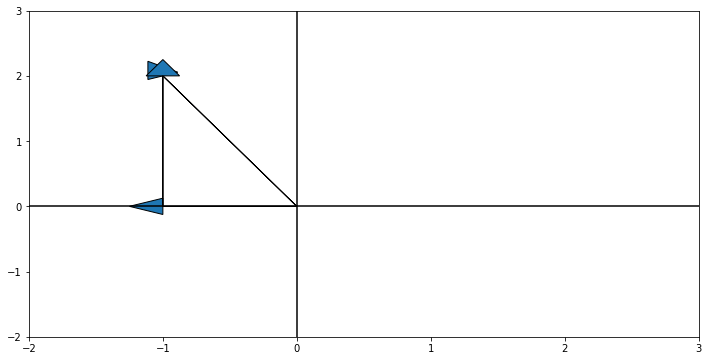

In [7]:
initialize_2d_plot(-2,3,-2,3)
draw_vector(a)
draw_vector((-1,0))
draw_vector((0,2),tail=(-1,0))

### Euclidean Distance

The magnitude of $a$ is

$$\rvert\rvert a \rvert\rvert = \sqrt{a_x^2+a_y^2}$$

which should be all to familiar to you as the Pythagorean Theorem.

Incredibly, this generalizes to $p$-dimensional vectors.

$$\rvert\rvert a_p \rvert\rvert = \sqrt{a_1^2+a_2^2\dots+a_p^2}$$

#### The $\ell_2$-Norm

This computation has a fancy name, the $\ell_2$-norm. 

We just saw this above with the function `np.linalg.norm`.

In [8]:
np.sqrt(a[0]**2 + a[1]**2)

2.2360679774997898

In [10]:
np.linalg.norm(a)

2.2360679774997898

We will see our friend, the $\ell_2$-norm again. 

For now, let's consider the first computation. 

$$\rvert\rvert a \rvert\rvert = \sqrt{a_x^2+a_y^2}$$

We can rewrite this as 

$$\rvert\rvert a \rvert\rvert = \sqrt{a_xa_x+a_ya_y}$$

Let's consider just the computation under the radical 


$$a_xa_x+a_ya_y$$

This is actually a special computation, the **dot product**.

## Definition of the Dot Product

The dot product, also known as the inner product, is an operation defined over a vector space that yields a scalar. 

We can think of is as a mapping of two vectors to a scalar value

$$f: \mathbf{u}, \mathbf{v} \mapsto \mathbb{R}$$

or the function 

$$f(\mathbf{u}, \mathbf{v}) = \alpha$$

where $\alpha \in \mathbb{R}$. 

#### Example

Given

$$\mathbf{u}=(1,0,-1)$$

$$\mathbf{v}=(-3,3,-2)$$

The dot product of $\mathbf{u}$ and $\mathbf{v}$ is $\langle \mathbf{u}, \mathbf{v}\rangle$ where

$$\langle \mathbf{u}, \mathbf{v}\rangle = 1\cdot(-3)+0\cdot3+(-1)\cdot(-2)=-1$$

$$\langle \mathbf{u}, \mathbf{v}\rangle = \sum u_i\cdot v_i$$

In [11]:
u = np.array((1,0,-1))
v = np.array((-3,3,-2))
u.dot(v)

-1

**NOTE:** $$\langle \mathbf{u}, \mathbf{v}\rangle = \langle \mathbf{v}, \mathbf{u}\rangle$$ for all $\mathbf{u}$, $\mathbf{v}$ 

We will need this later.

#### The Magnitude is the Square Root of the Dot Product of a Vector with Itself

Knowing this, it is easy to see that

$$a_xa_x+a_ya_y$$ 

is the dot product of $\mathbf{a}$ with itself.

Then 

$$\rvert\rvert a \rvert\rvert = \sqrt{\langle \mathbf{a}, \mathbf{a}\rangle}$$

In [12]:
np.linalg.norm(a)

2.2360679774997898

In [13]:
a.dot(a) == a[0]**2 + a[1]**2

True

In [14]:
np.sqrt(a.dot(a))

2.2360679774997898

### Geometric Interpretation of the Dot Product

Geometrically, the dot product is the magnitude of the project of one vector onto another vector. the green vector is $proj_{ab}$, the **projection** of $\mathbf a$ onto $\mathbf b$ - it is the part of $\mathbf a$ that is in the same direction as $\mathbf b$. The red vector is the **error vector**, the part of $\mathbf a$ that is *not* in the same direction as $\mathbf b$.

In [ ]:
b_norm = np.linalg.norm(b)
b_hat = b/b_norm
a_dot_b = a.dot(b)
proj_ab = b_hat*(a_dot_b/b_norm)
err = a - proj_ab

In [ ]:
initialize_2d_plot(x_min=-6, x_max=8, y_min=-1, y_max=6)
draw_vector(a)
draw_vector(proj_ab, kwargs={'color':'green', 'linewidth':6, 'alpha':0.3})
draw_vector(b)
draw_vector(err,proj_ab, kwargs={'head_width':.1, 'head_length':.25, 'color':'red', 'linewidth':2, 'alpha':0.3})

##### The projection of a vector onto itself is the vector itself!!!

Thus, the dot product is the magnitude of the vector!

### A Note on Writing Vectors

These two forms of vector representation are equivalent 

$$(a,b,c,d)=\left(\begin{matrix}a\\b\\c\\d\end{matrix}\right)$$

This form is known as the **column vector** form. 

A vector written as boldface later e.g. $\mathbf{u}$ is typically considered to be in column vector form.

#### A Note on Writing Vectors

A vector written as 

$$\left(\begin{matrix}e& f& g& h\end{matrix}\right)$$ 

is considered to be written in the **row vector** form.

#### Changing Vectors Forms

Vectors can be transformed from one form to the other via the transpose operation.

$$\mathbf{m}=(1,2,3,4)$$

then

$$\mathbf{m}^T=\left(\begin{matrix}1&2&3&4\end{matrix}\right)$$

#### `.T` as the transpose 

We can achieve the transpose in `numpy` with the `.T` attribute.

Note that the transpose on a vector is weird. This is because `numpy` doesn't really draw clear distinctions between row vectors and column vectors. 

In [ ]:
a.T == a

#### The importance of row and column vectors

This is important because we think of the dot product as **a row vector times a column vector**


$$\langle \mathbf{u}, \mathbf{v}\rangle = \sum u_i\cdot v_i = \mathbf{u}^T\mathbf{v}=\left(\begin{matrix}1&0&-1\end{matrix}\right)\left(\begin{matrix}-3\\3\\-2\end{matrix}\right)= 1\cdot(-3)+0\cdot+(-1)\cdot(-2)=1$$